# Kernel regression

**What you will learn today**: You will learn how to implement kernel regression. First we analyze a synthetic dataset: you will build the feature map associated with different kernels and we see how the learning performance can be different. As always after having understood the theoretical insights we step on to real-dataset problem: you can play using our dear friend sklearn to implement Kernel Ridge Regression, with a kernel of your choice.

**Important note!** There are 2 evauated questions! Make sure to answer them to get the points.

# 1) KRR from scratch 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Remember first lecture?  Let us use pandas for handling synthetic dataset

In [2]:
data = pd.read_csv('dataTP8.csv')

In [3]:
x,y = np.array(data['X']), np.array(data['Y'])

Let's see how it looks like

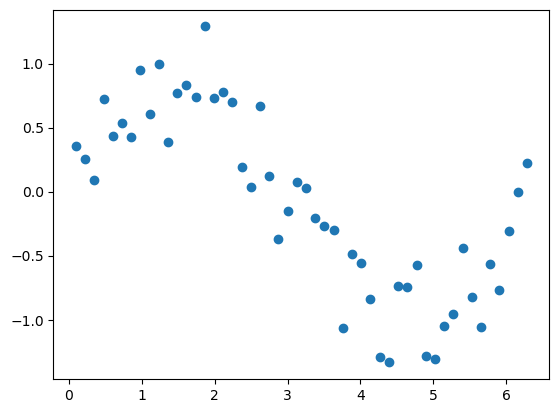

In [4]:
plt.plot(x,y,'o');

It does not seem a bad idea to use a polynomial fitting here. We have introduced in the theoretical lectures kernel methods: $$K(x,y) = {\phi(x)}^T{\phi(y)}$$

Let us pick for the first part of the analysis a feature map of the form:
$$ \phi_k^{(p)}(x) = x^k  \,\,\,\,\,\,\,\, k=1 \dots p $$

You may have studied this under the name *linear basis regression*.

The tools we need once we have mapped the datapoints in feature space are the usual one of linear regression as we know and all will be straight-forward.
We will study the behaviour as the degree $p$ varies, this will vary the complexity of the fitting model leading us to our usual bias-variance tradeoff consideration.

In [5]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    x_pol = []
    
    for i in range(0,len(x)):
        x_pol_ele = np.array([x[i]**j for j in range(0,degree+1)])
        x_pol.append(x_pol_ele)
    return np.array(x_pol)

def ridge_regression(y, X, lambda_):
    """implement ridge regression."""
    Xt = np.transpose(X)
    I = np.eye(len(Xt))
    w =  np.linalg.solve(Xt@X + (2*lambda_*len(y))*I,Xt@y)
    mse = (1/(2*len(y)))*np.sum((y-np.matmul(X,w))**2)
    return mse,w

def polynomial_regression(x,y,degrees,lambda_):
    num = len(degrees)
    fig, axs = plt.subplots(num,figsize=(15,15)) ; i =-1
    for degree in (degrees):
        i+=1   ; phi = build_poly(x, degree)
        
        mse , weights = ridge_regression(y, phi,lambda_)
        rmse = np.sqrt(2*mse)

        print("Processing {j}th experiment, degree={d}, rmse={loss}".format(
              j=i + 1, d=degree, loss=rmse))
        # print(weights)
        # plot fit
        # fhat = np.dot(phi,weights)
        xvals = np.arange(min(x) - 0.1, max(x) + 0.1, 0.1)
        phi = build_poly(xvals, degree) ; fhat = np.dot(phi,weights)
        axs[i].plot(x,
            y, 'o',label=f'Degree={degree} -- Data')
        axs[i].plot(xvals,
            fhat,label=f'Fit')
        axs[i].set_ylim([-1.4,1.4])
        axs[i].legend()
    # plt.tight_layout()
    

Processing 1th experiment, degree=5, rmse=0.2545435645040046
Processing 2th experiment, degree=12, rmse=0.24434768553799785
Processing 3th experiment, degree=20, rmse=0.2431279078442338
Processing 4th experiment, degree=50, rmse=0.22615544489097716
Processing 5th experiment, degree=80, rmse=0.23925737593978536
Processing 6th experiment, degree=120, rmse=0.23102786472513714
Processing 7th experiment, degree=160, rmse=0.21206491506239836


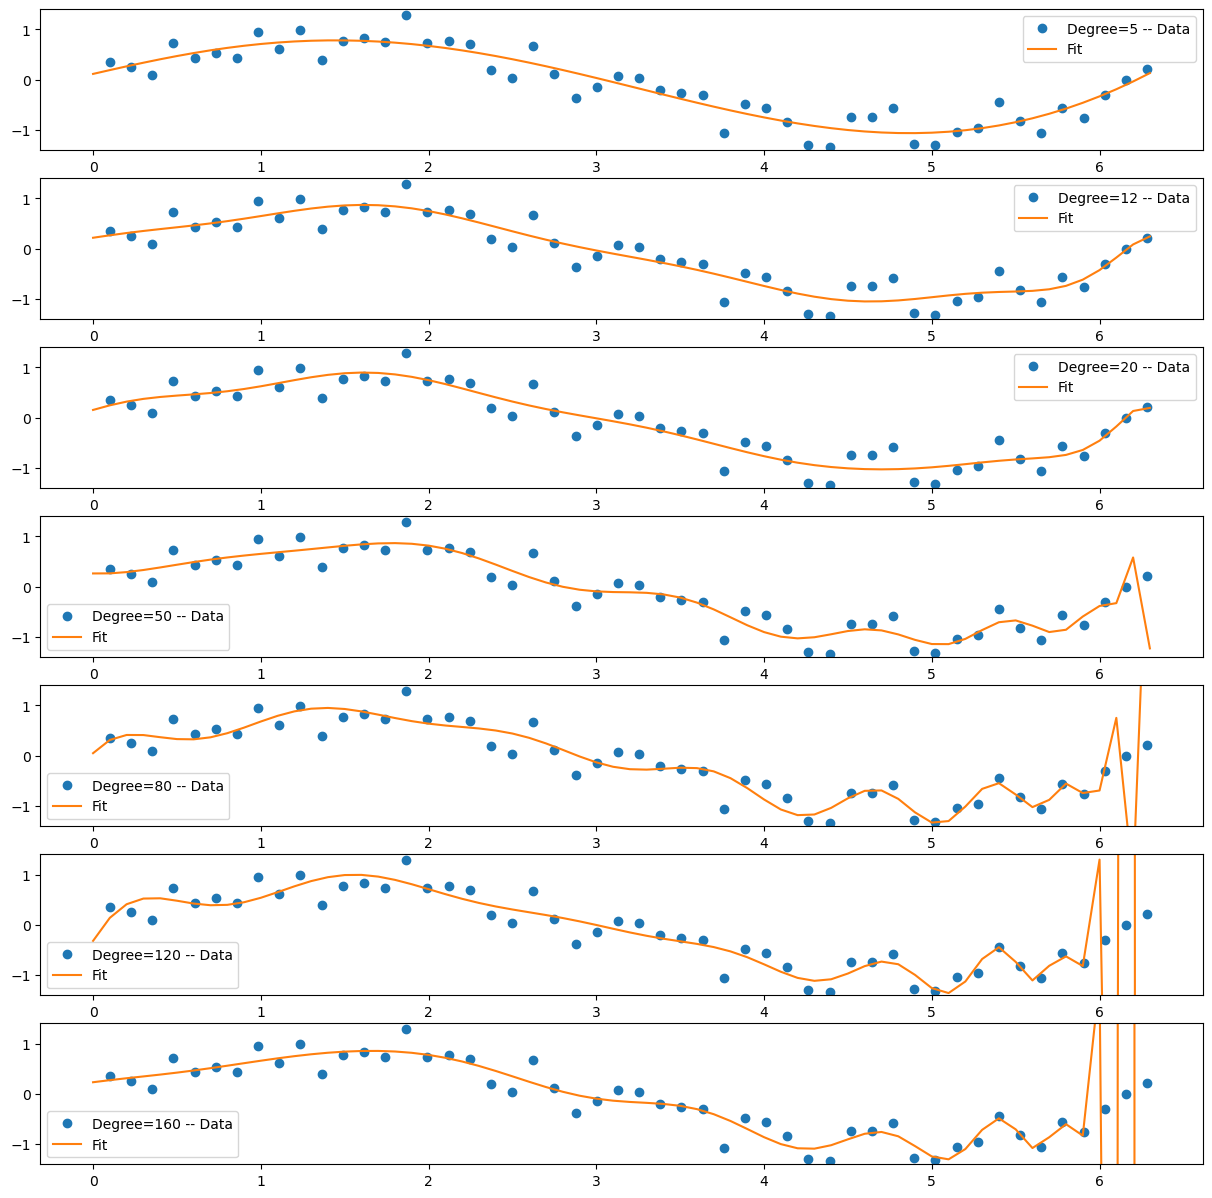

In [6]:
degrees = [5,  12, 20,50,80,120,160] ; lambda_ = 10e-6
polynomial_regression(x,y,degrees,lambda_)

We clearly see that by choosing a value of the degree too high we start to have bad fitting (i.e. overfitting). This feature map is not building a good kernel for studying the data.

It is interesting to understand if we can build another feature map, always in a polynomial fashion, that is able to having good learning rates.

First let's introduce some functions to split data in training and testing dataset to evaluate the performance of the model.

In [7]:
def split_data(x, y, ratio, seed=1):
    # set seed
    np.random.seed(seed)
    # ***************************************************
    index = np.arange(0,len(x))
    index_train = np.random.choice(index, int(ratio*len(x)), replace=False)
    
    training_x = x[index_train]
    training_y = y[index_train]
    test_x = x[[i for i in range(len(x)) if i not in index_train]]
    test_y = y[[i for i in range(len(y)) if i not in index_train]]
    
    return training_x, training_y, test_x, test_y

## Exercise
* Implement kernel regression with the feature map parametrized by $\gamma$ which we encode with the codework *rbf*: 

$$ \phi_k^{(p)}(x) = e^{\frac{-x^2}{\gamma}}\frac{x^k}{k!}  \,\,\,\,\,\,\,\, k=1 \dots p $$
* Study the behaviour as a function of $\lambda$ of the learning curves (test error and training error) and compare with what you would see with the previous feature map.
* What do you conclude?



Let us implement first the function for finding the learning curves of KRR.

In [8]:
def build_rbf_poly(x, degree, gamma):
    x_rbf_pol = []
    
    for i in range(0, len(x)):
        x_rbf_pol_ele = np.array([np.exp(-x[i]**2 / gamma) * (x[i]**j) / np.math.factorial(j) for j in range(0, degree+1)])
        x_rbf_pol.append(x_rbf_pol_ele)
    return np.array(x_rbf_pol)

def kernel_ridge_regression(x, y, degrees, lambda_, gamma):
    num = len(degrees)
    i = -1
    for degree in degrees:
        i += 1
        phi = build_rbf_poly(x, degree, gamma)
        
        mse, weights = ridge_regression(y, phi, lambda_)
        rmse = np.sqrt(2 * mse)

        print("Processing {j}th experiment, degree={d}, rmse={loss}".format(
              j=i + 1, d=degree, loss=rmse))
        
        xvals = np.arange(min(x) - 0.1, max(x) + 0.1, 0.1)
        phi = build_rbf_poly(xvals, degree, gamma)
        fhat = np.dot(phi, weights)


In [9]:
lams = np.logspace(-4, 1, 5)
for lam in lams:
    kernel_ridge_regression(x, y, degrees, lam, 0.1)

AttributeError: module 'numpy' has no attribute 'math'

# 2) Kernel methods using Sklearn 

We have seen how to build Kernel Ridge Regression (KRR) from scratch starting from the feature map. The idea to map datapoint in an higher dimensional space (i.e. kernel trick) can be used also in classification task. We will consider again our old friend MNIST, we will consider SVC (Support Vector Classification). We will see that, at stake with previous lecture, *SVC* will accept the parameter *kernel* to choose in which space mapping our datapoints.

In [10]:
import time

from sklearn.datasets import fetch_openml # MNIST data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

print(__doc__)

# Turn down for faster convergence
t0 = time.time()
train_size = 9000 # 60000
test_size = 1500 # 10000

### load MNIST data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)
X = np.array(X)[:train_size+test_size]
y = np.array(y)[:train_size+test_size]


Automatically created module for IPython interactive environment


Let's plot an image to see how it looks like with plt.imshow.

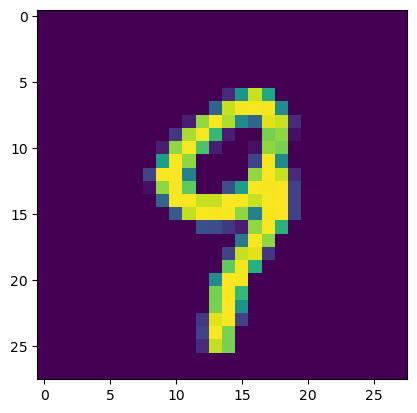

In [11]:
plt.imshow(X[6542,:].reshape(28,28));

We shuffle the data and we do the test-train splitting.

In [12]:
# shuffle data
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))
# pick training and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=train_size,test_size=test_size)

### Exercise [EVALUATED]
Use `sklearn.svm.SVC` to classify the MNIST dataset. Use the following kernels: `linear`, `poly`, `rbf`, `sigmoid`. For each kernel do a cross-validation to find the best hyperparameters. Use `GridSearchCV` to do that.
Finally return the bes global model and the best kernel for the dataset.

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# standard scaler
model = make_pipeline(StandardScaler(), SVC(max_iter=1000, tol=1e-3))

folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the parameter grid for each kernel
param_grid = {
    'linear': {'svc__C': [0.1, 1, 10, 100]},
    'poly': {'svc__C': [0.1, 1, 10, 100], 'svc__degree': [2, 3, 4]},
    'rbf': {'svc__C': [0.1, 1, 10, 100], 'svc__gamma': [0.001, 0.01, 0.1, 1]},
    'sigmoid': {'svc__C': [0.1, 1, 10, 100], 'svc__gamma': [0.001, 0.01, 0.1, 1]}
}

best_score = 0
best_kernel = None
best_model = None

# Iterate over each kernel and perform GridSearchCV
for kernel in param_grid:
    clf = GridSearchCV(model, param_grid[kernel], cv=folds, n_jobs=-1, verbose=3)
    clf.fit(X_train, y_train)
    
    if clf.best_score_ > best_score:
        best_score = clf.best_score_
        best_kernel = kernel
        best_model = clf.best_estimator_

print(f"Best Kernel: {best_kernel}")
print(f"Best Model: {best_model}")
print(f"Best Score: {best_score}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/

[CV 3/5] END .........................svc__C=10;, score=0.933 total time=  48.4s
[CV 1/5] END .........................svc__C=10;, score=0.946 total time=  48.7s
[CV 1/5] END ........................svc__C=100;, score=0.945 total time=  49.2s
[CV 4/5] END .........................svc__C=10;, score=0.940 total time=  50.4s
[CV 2/5] END .........................svc__C=10;, score=0.944 total time=  51.0s
[CV 2/5] END ..........................svc__C=1;, score=0.936 total time=  53.0s
[CV 5/5] END .........................svc__C=10;, score=0.939 total time=  53.1s
[CV 5/5] END ..........................svc__C=1;, score=0.928 total time=  53.6s
[CV 1/5] END ..........................svc__C=1;, score=0.933 total time=  53.6s
[CV 4/5] END ..........................svc__C=1;, score=0.936 total time=  53.9s
[CV 3/5] END ..........................svc__C=1;, score=0.924 total time=  54.6s


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END ........................svc__C=0.1;, score=0.873 total time= 1.2min
[CV 3/5] END ........................svc__C=100;, score=0.932 total time=  26.4s
[CV 5/5] END ........................svc__C=100;, score=0.939 total time=  25.3s
[CV 2/5] END ........................svc__C=0.1;, score=0.880 total time= 1.3min
[CV 4/5] END ........................svc__C=100;, score=0.941 total time=  26.6s


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END ........................svc__C=0.1;, score=0.869 total time= 1.3min
[CV 3/5] END ........................svc__C=0.1;, score=0.858 total time= 1.3min
[CV 1/5] END ........................svc__C=0.1;, score=0.869 total time= 1.3min
[CV 2/5] END ........................svc__C=100;, score=0.944 total time=  30.8s


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...........svc__C=1, svc__degree=2;, score=0.933 total time=  59.9s
[CV 2/5] END .........svc__C=0.1, svc__degree=2;, score=0.880 total time= 1.6min
[CV 1/5] END .........svc__C=0.1, svc__degree=2;, score=0.869 total time= 1.6min
[CV 5/5] END .........svc__C=0.1, svc__degree=3;, score=0.873 total time= 1.6min
[CV 3/5] END .........svc__C=0.1, svc__degree=4;, score=0.858 total time= 1.6min
[CV 4/5] END .........svc__C=0.1, svc__degree=4;, score=0.869 total time= 1.6min
[CV 5/5] END .........svc__C=0.1, svc__degree=4;, score=0.873 total time= 1.6min
[CV 2/5] END .........svc__C=0.1, svc__degree=4;, score=0.880 total time= 1.6min
[CV 1/5] END .........svc__C=0.1, svc__degree=4;, score=0.869 total time= 1.6min
[CV 1/5] END .........svc__C=0.1, svc__degree=3;, score=0.869 total time= 1.6min
[CV 5/5] END .........svc__C=0.1, svc__degree=2;, score=0.873 total time= 1.6min
[CV 3/5] END .........svc__C=0.1, svc__degree=3;

/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END ...........svc__C=1, svc__degree=2;, score=0.936 total time=  52.3s
[CV 3/5] END ...........svc__C=1, svc__degree=4;, score=0.924 total time=  52.1s
[CV 5/5] END ...........svc__C=1, svc__degree=3;, score=0.928 total time=  52.7s


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END ...........svc__C=1, svc__degree=4;, score=0.936 total time=  52.7s
[CV 3/5] END ...........svc__C=1, svc__degree=2;, score=0.924 total time=  55.7s
[CV 1/5] END ..........svc__C=10, svc__degree=2;, score=0.946 total time=  50.9s
[CV 5/5] END ...........svc__C=1, svc__degree=2;, score=0.928 total time=  55.3s
[CV 4/5] END ...........svc__C=1, svc__degree=3;, score=0.936 total time=  54.4s
[CV 1/5] END ...........svc__C=1, svc__degree=3;, score=0.933 total time=  55.7s
[CV 2/5] END ...........svc__C=1, svc__degree=4;, score=0.936 total time=  54.6s
[CV 1/5] END ...........svc__C=1, svc__degree=4;, score=0.933 total time=  55.1s
[CV 2/5] END ...........svc__C=1, svc__degree=3;, score=0.936 total time=  56.2s
[CV 3/5] END ...........svc__C=1, svc__degree=3;, score=0.924 total time=  57.4s
[CV 2/5] END ..........svc__C=10, svc__degree=2;, score=0.944 total time=  52.7s
[CV 5/5] END ...........svc__C=1, svc__degree=4;, score=0.928 total time=  56.2s
[CV 3/5] END ..........svc__

/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/

[CV 4/5] END ..........svc__C=10, svc__degree=2;, score=0.940 total time=  49.2s
[CV 5/5] END ..........svc__C=10, svc__degree=2;, score=0.939 total time=  50.0s
[CV 2/5] END ..........svc__C=10, svc__degree=3;, score=0.944 total time=  50.2s
[CV 3/5] END ..........svc__C=10, svc__degree=3;, score=0.933 total time=  50.4s
[CV 2/5] END ..........svc__C=10, svc__degree=4;, score=0.944 total time=  50.3s
[CV 1/5] END ..........svc__C=10, svc__degree=3;, score=0.946 total time=  52.3s
[CV 1/5] END ..........svc__C=10, svc__degree=4;, score=0.946 total time=  51.2s


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END ..........svc__C=10, svc__degree=3;, score=0.939 total time=  51.9s
[CV 3/5] END ..........svc__C=10, svc__degree=4;, score=0.933 total time=  51.3s
[CV 4/5] END ..........svc__C=10, svc__degree=3;, score=0.940 total time=  52.6s
[CV 4/5] END ..........svc__C=10, svc__degree=4;, score=0.940 total time=  51.6s
[CV 5/5] END ..........svc__C=10, svc__degree=4;, score=0.939 total time=  51.7s
[CV 3/5] END .........svc__C=100, svc__degree=2;, score=0.932 total time=  50.7s
[CV 1/5] END .........svc__C=100, svc__degree=2;, score=0.945 total time=  52.6s
[CV 2/5] END .........svc__C=100, svc__degree=2;, score=0.944 total time=  52.3s
[CV 4/5] END .........svc__C=100, svc__degree=2;, score=0.941 total time=  50.1s


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END .........svc__C=100, svc__degree=2;, score=0.939 total time=  31.6s


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END .........svc__C=100, svc__degree=4;, score=0.932 total time=  28.3s


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END .........svc__C=100, svc__degree=3;, score=0.932 total time=  31.6s
[CV 5/5] END .........svc__C=100, svc__degree=3;, score=0.939 total time=  31.9s


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END .........svc__C=100, svc__degree=3;, score=0.945 total time=  34.9s


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END .........svc__C=100, svc__degree=4;, score=0.944 total time=  34.3s
[CV 5/5] END .........svc__C=100, svc__degree=4;, score=0.939 total time=  35.1s
[CV 1/5] END .........svc__C=100, svc__degree=4;, score=0.945 total time=  36.6s
[CV 2/5] END .........svc__C=100, svc__degree=3;, score=0.944 total time=  38.1s
[CV 4/5] END .........svc__C=100, svc__degree=4;, score=0.941 total time=  36.5s
[CV 4/5] END .........svc__C=100, svc__degree=3;, score=0.941 total time=  38.2s


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 5/5] END ......svc__C=0.1, svc__gamma=0.001;, score=0.874 total time= 1.6min
[CV 2/5] END ......svc__C=0.1, svc__gamma=0.001;, score=0.882 total time= 1.6min
[CV 3/5] END ......svc__C=0.1, svc__gamma=0.001;, score=0.862 total time= 1.6min
[CV 1/5] END ......svc__C=0.1, svc__gamma=0.001;, score=0.877 total time= 1.7min
[CV 4/5] END ......svc__C=0.1, svc__gamma=0.001;, score=0.879 total time= 1.7min
[CV 1/5] END ........svc__C=1, svc__gamma=0.001;, score=0.931 total time=  49.1s


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/

[CV 4/5] END .......svc__C=0.1, svc__gamma=0.01;, score=0.471 total time= 3.0min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END .......svc__C=0.1, svc__gamma=0.01;, score=0.393 total time= 3.0min
[CV 5/5] END .......svc__C=0.1, svc__gamma=0.01;, score=0.471 total time= 3.0min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END .......svc__C=0.1, svc__gamma=0.01;, score=0.482 total time= 3.1min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END .......svc__C=0.1, svc__gamma=0.01;, score=0.412 total time= 3.1min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END ........svc__C=1, svc__gamma=0.001;, score=0.933 total time=  49.1s
[CV 3/5] END ........svc__C=0.1, svc__gamma=0.1;, score=0.122 total time= 3.4min
[CV 1/5] END ........svc__C=0.1, svc__gamma=0.1;, score=0.110 total time= 3.5min
[CV 4/5] END ........svc__C=0.1, svc__gamma=0.1;, score=0.112 total time= 3.5min
[CV 5/5] END ........svc__C=0.1, svc__gamma=0.1;, score=0.107 total time= 3.5min
[CV 2/5] END ........svc__C=0.1, svc__gamma=0.1;, score=0.113 total time= 3.6min
[CV 1/5] END ..........svc__C=0.1, svc__gamma=1;, score=0.110 total time= 3.6min
[CV 3/5] END ........svc__C=1, svc__gamma=0.001;, score=0.926 total time=  47.0s
[CV 4/5] END ........svc__C=1, svc__gamma=0.001;, score=0.939 total time=  48.8s
[CV 5/5] END ........svc__C=1, svc__gamma=0.001;, score=0.929 total time=  48.3s


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END ..........svc__C=0.1, svc__gamma=1;, score=0.113 total time= 3.6min
[CV 4/5] END ..........svc__C=0.1, svc__gamma=1;, score=0.112 total time= 3.6min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END ..........svc__C=0.1, svc__gamma=1;, score=0.122 total time= 3.7min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END ..........svc__C=0.1, svc__gamma=1;, score=0.107 total time= 3.6min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END .........svc__C=1, svc__gamma=0.01;, score=0.761 total time= 2.6min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END .........svc__C=1, svc__gamma=0.01;, score=0.762 total time= 2.6min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END .........svc__C=1, svc__gamma=0.01;, score=0.758 total time= 2.7min
[CV 4/5] END .........svc__C=1, svc__gamma=0.01;, score=0.751 total time= 2.6min
[CV 1/5] END .......svc__C=10, svc__gamma=0.001;, score=0.950 total time=  45.0s
[CV 5/5] END .........svc__C=1, svc__gamma=0.01;, score=0.774 total time= 2.6min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END .......svc__C=10, svc__gamma=0.001;, score=0.946 total time=  42.1s
[CV 3/5] END .......svc__C=10, svc__gamma=0.001;, score=0.936 total time=  43.1s


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/

[CV 4/5] END .......svc__C=10, svc__gamma=0.001;, score=0.944 total time=  42.7s
[CV 5/5] END .......svc__C=10, svc__gamma=0.001;, score=0.942 total time=  42.8s


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END ..........svc__C=1, svc__gamma=0.1;, score=0.181 total time= 3.5min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END ..........svc__C=1, svc__gamma=0.1;, score=0.186 total time= 3.4min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END ..........svc__C=1, svc__gamma=0.1;, score=0.172 total time= 3.5min
[CV 4/5] END ..........svc__C=1, svc__gamma=0.1;, score=0.179 total time= 3.4min
[CV 5/5] END ..........svc__C=1, svc__gamma=0.1;, score=0.162 total time= 3.6min
[CV 2/5] END ............svc__C=1, svc__gamma=1;, score=0.113 total time= 3.6min
[CV 1/5] END ............svc__C=1, svc__gamma=1;, score=0.110 total time= 3.7min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/

[CV 2/5] END ........svc__C=10, svc__gamma=0.01;, score=0.779 total time= 2.5min
[CV 1/5] END ........svc__C=10, svc__gamma=0.01;, score=0.773 total time= 2.7min
[CV 3/5] END ........svc__C=10, svc__gamma=0.01;, score=0.773 total time= 2.4min
[CV 4/5] END ............svc__C=1, svc__gamma=1;, score=0.112 total time= 3.6min
[CV 3/5] END ............svc__C=1, svc__gamma=1;, score=0.122 total time= 3.7min
[CV 4/5] END ........svc__C=10, svc__gamma=0.01;, score=0.765 total time= 2.5min
[CV 5/5] END ............svc__C=1, svc__gamma=1;, score=0.107 total time= 3.6min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END ........svc__C=10, svc__gamma=0.01;, score=0.787 total time= 2.7min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END ......svc__C=100, svc__gamma=0.001;, score=0.950 total time=  40.4s
[CV 3/5] END ......svc__C=100, svc__gamma=0.001;, score=0.937 total time=  41.6s
[CV 2/5] END ......svc__C=100, svc__gamma=0.001;, score=0.946 total time=  44.1s
[CV 5/5] END ......svc__C=100, svc__gamma=0.001;, score=0.942 total time=  42.6s
[CV 4/5] END ......svc__C=100, svc__gamma=0.001;, score=0.943 total time=  44.0s


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/

[CV 1/5] END .........svc__C=10, svc__gamma=0.1;, score=0.181 total time= 3.6min
[CV 3/5] END .........svc__C=10, svc__gamma=0.1;, score=0.187 total time= 3.4min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END .........svc__C=10, svc__gamma=0.1;, score=0.163 total time= 3.4min
[CV 2/5] END .........svc__C=10, svc__gamma=0.1;, score=0.174 total time= 3.5min
[CV 4/5] END .........svc__C=10, svc__gamma=0.1;, score=0.180 total time= 3.5min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END ...........svc__C=10, svc__gamma=1;, score=0.110 total time= 3.5min
[CV 2/5] END ...........svc__C=10, svc__gamma=1;, score=0.113 total time= 3.6min
[CV 3/5] END ...........svc__C=10, svc__gamma=1;, score=0.122 total time= 3.6min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/

[CV 2/5] END .......svc__C=100, svc__gamma=0.01;, score=0.779 total time= 2.5min
[CV 1/5] END .......svc__C=100, svc__gamma=0.01;, score=0.773 total time= 2.6min
[CV 3/5] END .......svc__C=100, svc__gamma=0.01;, score=0.773 total time= 2.6min
[CV 4/5] END .......svc__C=100, svc__gamma=0.01;, score=0.765 total time= 2.6min
[CV 5/5] END .......svc__C=100, svc__gamma=0.01;, score=0.787 total time= 2.5min
[CV 4/5] END ...........svc__C=10, svc__gamma=1;, score=0.112 total time= 3.5min
[CV 5/5] END ...........svc__C=10, svc__gamma=1;, score=0.107 total time= 3.5min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END ........svc__C=100, svc__gamma=0.1;, score=0.181 total time= 3.2min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/

[CV 3/5] END ........svc__C=100, svc__gamma=0.1;, score=0.187 total time= 2.7min
[CV 4/5] END ........svc__C=100, svc__gamma=0.1;, score=0.180 total time= 2.7min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END ........svc__C=100, svc__gamma=0.1;, score=0.174 total time= 2.9min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END ..........svc__C=100, svc__gamma=1;, score=0.110 total time= 2.8min
[CV 3/5] END ..........svc__C=100, svc__gamma=1;, score=0.122 total time= 2.2min
[CV 5/5] END ........svc__C=100, svc__gamma=0.1;, score=0.163 total time= 2.9min
[CV 4/5] END ..........svc__C=100, svc__gamma=1;, score=0.112 total time= 2.3min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END ..........svc__C=100, svc__gamma=1;, score=0.113 total time= 2.6min
[CV 5/5] END ..........svc__C=100, svc__gamma=1;, score=0.107 total time= 1.6min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ......svc__C=0.1, svc__gamma=0.001;, score=0.877 total time= 1.6min
[CV 2/5] END ......svc__C=0.1, svc__gamma=0.001;, score=0.882 total time= 1.6min
[CV 5/5] END ......svc__C=0.1, svc__gamma=0.001;, score=0.874 total time= 1.6min
[CV 4/5] END ......svc__C=0.1, svc__gamma=0.001;, score=0.879 total time= 1.6min
[CV 3/5] END ......svc__C=0.1, svc__gamma=0.001;, score=0.862 total time= 1.7min
[CV 1/5] END ........svc__C=1, svc__gamma=0.001;, score=0.931 total time=  51.1s


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/

[CV 2/5] END .......svc__C=0.1, svc__gamma=0.01;, score=0.482 total time= 3.0min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END .......svc__C=0.1, svc__gamma=0.01;, score=0.471 total time= 3.1min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END .......svc__C=0.1, svc__gamma=0.01;, score=0.471 total time= 3.1min
[CV 3/5] END .......svc__C=0.1, svc__gamma=0.01;, score=0.393 total time= 3.1min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END .......svc__C=0.1, svc__gamma=0.01;, score=0.412 total time= 3.1min
[CV 2/5] END ........svc__C=1, svc__gamma=0.001;, score=0.933 total time=  51.8s
[CV 1/5] END ........svc__C=0.1, svc__gamma=0.1;, score=0.110 total time= 3.4min
[CV 4/5] END ........svc__C=0.1, svc__gamma=0.1;, score=0.112 total time= 3.5min
[CV 5/5] END ........svc__C=0.1, svc__gamma=0.1;, score=0.107 total time= 3.5min
[CV 2/5] END ........svc__C=0.1, svc__gamma=0.1;, score=0.113 total time= 3.5min
[CV 1/5] END ..........svc__C=0.1, svc__gamma=1;, score=0.110 total time= 3.6min
[CV 3/5] END ........svc__C=0.1, svc__gamma=0.1;, score=0.122 total time= 3.6min
[CV 3/5] END ........svc__C=1, svc__gamma=0.001;, score=0.926 total time=  46.9s
[CV 5/5] END ........svc__C=1, svc__gamma=0.001;, score=0.929 total time=  48.2s
[CV 4/5] END ........svc__C=1, svc__gamma=0.001;, score=0.939 total time=  50.8s


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END ..........svc__C=0.1, svc__gamma=1;, score=0.113 total time= 3.6min
[CV 3/5] END ..........svc__C=0.1, svc__gamma=1;, score=0.122 total time= 3.6min
[CV 4/5] END ..........svc__C=0.1, svc__gamma=1;, score=0.112 total time= 3.6min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END ..........svc__C=0.1, svc__gamma=1;, score=0.107 total time= 3.7min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END .........svc__C=1, svc__gamma=0.01;, score=0.761 total time= 2.6min
[CV 2/5] END .........svc__C=1, svc__gamma=0.01;, score=0.762 total time= 2.6min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END .........svc__C=1, svc__gamma=0.01;, score=0.758 total time= 2.5min
[CV 5/5] END .........svc__C=1, svc__gamma=0.01;, score=0.774 total time= 2.5min
[CV 1/5] END .......svc__C=10, svc__gamma=0.001;, score=0.950 total time=  43.5s
[CV 4/5] END .........svc__C=1, svc__gamma=0.01;, score=0.751 total time= 2.6min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END .......svc__C=10, svc__gamma=0.001;, score=0.936 total time=  40.8s


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END .......svc__C=10, svc__gamma=0.001;, score=0.946 total time=  47.0s


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END .......svc__C=10, svc__gamma=0.001;, score=0.944 total time=  41.7s
[CV 5/5] END .......svc__C=10, svc__gamma=0.001;, score=0.942 total time=  42.6s


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END ..........svc__C=1, svc__gamma=0.1;, score=0.181 total time= 3.4min
[CV 2/5] END ..........svc__C=1, svc__gamma=0.1;, score=0.172 total time= 3.4min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END ..........svc__C=1, svc__gamma=0.1;, score=0.186 total time= 3.4min
[CV 4/5] END ..........svc__C=1, svc__gamma=0.1;, score=0.179 total time= 3.4min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END ..........svc__C=1, svc__gamma=0.1;, score=0.162 total time= 3.5min
[CV 2/5] END ............svc__C=1, svc__gamma=1;, score=0.113 total time= 3.6min
[CV 1/5] END ............svc__C=1, svc__gamma=1;, score=0.110 total time= 3.7min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/

[CV 1/5] END ........svc__C=10, svc__gamma=0.01;, score=0.773 total time= 2.6min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END ........svc__C=10, svc__gamma=0.01;, score=0.779 total time= 2.7min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END ............svc__C=1, svc__gamma=1;, score=0.122 total time= 3.7min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END ............svc__C=1, svc__gamma=1;, score=0.112 total time= 3.7min
[CV 5/5] END ............svc__C=1, svc__gamma=1;, score=0.107 total time= 3.7min
[CV 3/5] END ........svc__C=10, svc__gamma=0.01;, score=0.773 total time= 2.6min
[CV 5/5] END ........svc__C=10, svc__gamma=0.01;, score=0.787 total time= 2.6min
[CV 4/5] END ........svc__C=10, svc__gamma=0.01;, score=0.765 total time= 2.7min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END ......svc__C=100, svc__gamma=0.001;, score=0.950 total time=  41.1s


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END ......svc__C=100, svc__gamma=0.001;, score=0.946 total time=  42.7s


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END ......svc__C=100, svc__gamma=0.001;, score=0.937 total time=  46.0s
[CV 4/5] END ......svc__C=100, svc__gamma=0.001;, score=0.943 total time=  47.2s
[CV 5/5] END ......svc__C=100, svc__gamma=0.001;, score=0.942 total time=  43.4s


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END .........svc__C=10, svc__gamma=0.1;, score=0.181 total time= 3.4min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END .........svc__C=10, svc__gamma=0.1;, score=0.174 total time= 3.6min
[CV 3/5] END .........svc__C=10, svc__gamma=0.1;, score=0.187 total time= 3.5min
[CV 5/5] END .........svc__C=10, svc__gamma=0.1;, score=0.163 total time= 3.5min
[CV 4/5] END .........svc__C=10, svc__gamma=0.1;, score=0.180 total time= 3.6min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END ...........svc__C=10, svc__gamma=1;, score=0.110 total time= 3.6min
[CV 3/5] END ...........svc__C=10, svc__gamma=1;, score=0.122 total time= 3.7min
[CV 2/5] END ...........svc__C=10, svc__gamma=1;, score=0.113 total time= 3.7min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END .......svc__C=100, svc__gamma=0.01;, score=0.773 total time= 2.6min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END .......svc__C=100, svc__gamma=0.01;, score=0.779 total time= 2.6min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END .......svc__C=100, svc__gamma=0.01;, score=0.773 total time= 2.7min
[CV 4/5] END .......svc__C=100, svc__gamma=0.01;, score=0.765 total time= 2.6min
[CV 4/5] END ...........svc__C=10, svc__gamma=1;, score=0.112 total time= 3.7min
[CV 5/5] END ...........svc__C=10, svc__gamma=1;, score=0.107 total time= 3.7min
[CV 5/5] END .......svc__C=100, svc__gamma=0.01;, score=0.787 total time= 2.6min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END ........svc__C=100, svc__gamma=0.1;, score=0.181 total time= 2.9min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END ........svc__C=100, svc__gamma=0.1;, score=0.174 total time= 3.0min
[CV 3/5] END ........svc__C=100, svc__gamma=0.1;, score=0.187 total time= 2.8min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END ........svc__C=100, svc__gamma=0.1;, score=0.180 total time= 2.8min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END ........svc__C=100, svc__gamma=0.1;, score=0.163 total time= 2.9min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END ..........svc__C=100, svc__gamma=1;, score=0.113 total time= 2.6min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END ..........svc__C=100, svc__gamma=1;, score=0.110 total time= 3.0min


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END ..........svc__C=100, svc__gamma=1;, score=0.112 total time= 2.4min
[CV 5/5] END ..........svc__C=100, svc__gamma=1;, score=0.107 total time= 1.8min
[CV 3/5] END ..........svc__C=100, svc__gamma=1;, score=0.122 total time= 2.5min
Best Kernel: rbf
Best Model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, gamma=0.001, max_iter=1000))])
Best Score: 0.9435555555555556


/home/linus/micromamba/envs/foil/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [16]:
print("overall:")
print(f"Best Kernel: {best_kernel}")
print(f"Best Model: {best_model}")
print(f"Best Score: {best_score}")

overall:
Best Kernel: rbf
Best Model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, gamma=0.001, max_iter=1000))])
Best Score: 0.9435555555555556


# Backpropagation from scratch

**What will you learn today**: Backpropagation is the fundamental building block of deep learning, as it allows to automatically compute the gradients of any arbitrary compositional function with a similar computational cost than evaluating it. This makes possible to work with arbitrarily complex neural network architectures, composed of many layers, without the need to manually compute their gradients. Backpropagation is already implemented in all high-level deep learning frameworks, e.g. `PyTorch`, and as such, we would hardly ever need to think of how it works. However, it is a very educational exercise to implement it once in your life, and that is precisely what we will do in this exercise! In particular, you will learn to implement and derive the forward and backward pass of a very simple neural network in pure `numpy`. As a bonus, we will also explore how to approximate the non-convex loss landscape of a neural network by a convex one, and we will learn how to use such approximation to derive intuitions about how different design choices affect the network's behaviour.

# 1) Forward pass
To simplify the exercise, we will only work with a simple architecture, consisting of a feedforward neural network with two fully connected layers, i.e., a single-hidden layer MLP.

![simple_mlp](simple_mlp.png)

Mathematically, we can write the feedforward computation as:
$$ x_j^{(1)}=\sigma\left(z_j^{(1)}\right)=\sigma\left(\sum_{i=1}^D w_{i,j}^{(1)} x_i^{(0)}+b_j^{(1)}\right), $$
$$ \hat y =\sigma\left(z_1^{(2)}\right)=\sigma\left(\sum_{i=1}^K w_{i,1}^{(2)} x_i^{(1)}+b_1^{(2)}\right),  $$
where $\sigma(\cdot)$ denotes the sigmoid activation function. In the rest of the exercise, we will use $D=4$, and $K=5$.

We can alternatively write the same computation in vector notation
$$ \bf x^{(1)}=\sigma\left(\bf z^{(1)}\right)=\sigma\left(\bf W^{(1)} \bf x^{(0)}+\bf b^{(1)}\right), $$
$$ \hat y=\sigma\left(z^{(2)}\right)=\sigma\left(\bf {w^{(2)}}^\top \bf x^{(1)}+b^{(2)}\right). $$

In general, we will denote the function computed by the neural network as $f_{\bf w}(\bf x)=\hat y$, and use $\bf w$ to represent the vector of all weights in the architecture.

## Exercise


In [ ]:
x = np.array([0.01, 0.02, 0.03, 0.04])
W = {
    "w_1": np.ones((4, 5)),
    "w_2": np.ones(5)
}
y = 1

Then, let's implement the forward pass. If you implement it correctly, you should see that your code can pass the test successfully.

In [ ]:
def simple_feed_forward(x, W):
    # Your code here
    pass

try:
    expected = 0.93244675427215695
    _, _, yours = simple_feed_forward(x, W)
    assert np.sum((yours - expected) ** 2) < 1e-15
    print("Your implementation is correct!")
except:
    print("Your implementation is not correct.")

## 2) Backward pass

We now have a working implementation of our network! However, if we want to be able to train it using gradient descent, we need to be able to compute its gradient. Let's do that.

We will use the squared error as our loss function, i.e.,
$$\ell(y,\hat y)=\frac{1}{2}(\hat y-y)^2$$


### Exercise
Evaluate the derivative of $\mathcal{L}(\bf w)=\ell(y, f_{\bf w}(\bf x))$ with respect to $w_{i,1}^{(2)}$ and $w_{i,j}^{(1)}$ for a single training sample $(\bf x, y)$, by following the backpropagation algorithm.

### Exercise [EVALUATED]
Now that we have derived the backward pass analytically, let's implement it in Python!

*Hint*: You might want to slightly change `simple_feed_forward`.

In [ ]:
def simple_backpropagation(y, x, W):
    """Do backpropagation and get delta_W."""
    # Your code here
    pass
  
try:
    expected = {
        'w_1': np.array([
            [ -1.06113639e-05,  -1.06113639e-05,  -1.06113639e-05, -1.06113639e-05,  -1.06113639e-05],
            [ -2.12227277e-05,  -2.12227277e-05,  -2.12227277e-05, -2.12227277e-05,  -2.12227277e-05],
            [ -3.18340916e-05,  -3.18340916e-05,  -3.18340916e-05, -3.18340916e-05,  -3.18340916e-05],
            [ -4.24454555e-05,  -4.24454555e-05,  -4.24454555e-05, -4.24454555e-05,  -4.24454555e-05]]),
        'w_2': np.array(
            [-0.00223387, -0.00223387, -0.00223387, -0.00223387, -0.00223387])
    }
    yours = simple_backpropagation(y, x, W)
    assert np.sum(
        [np.sum((yours[key] - expected[key]) ** 2) for key in expected.keys()]) < 1e-15
    print("Your implementation is correct!")
except:
    print("Your implementation is not correct!")

# 3) Bonus: Effect of regularization

One of the first things we learn about neural networks is that their loss landscape is not convex. This means that analyzing how different design choices will affect their performance precisely is generally very hard. Fortunately, however, many times we can get an intuition of the behaviour of a neural network by taking a few approximations. We will now explore one of those. In particular, we will use some simple approximations to explore what is the effect of regularization on the weights of a neural network. 

Let $\bf w$ be the weight vetor of all weights in the neural network, and recall that we do not normally penalize the bias term, so let's ignore it for the rest of our derivations. Furthermore, let $\bf w^\star$ denote a parameter that minimizes the cost function $\mathcal L$ for the given test set (where the cost functions does not include the regularization). We would like to study how the optimal weight changes if we include some regularization.

In order to make the problem tractable, assume that $\mathcal L(\bf w)$ can be locally expanded around the optimal parrameter $\bf w^\star$ in the form
$$\mathcal L(\bf w) =\mathcal L(\bf w^\star)+\frac{1}{2}(\bf w-\bf w^\star)^\top\bf H(\bf w-\bf w^\star),$$
where $\bf H$ denotes the Hessian, whose components are the entries
$$\cfrac{\partial^2 \mathcal{L}}{\partial \bf w_i \partial \bf w_j }$$

Now, let's add a regularization term of the form $\frac{1}{2}\mu\|\bf w\|^2_2$.

## Exercise
1. Show that the optimum weight vector for the regularized problem is given by $$\bf Q(\bf \Lambda+\mu\bf I)^{-1}\bf \Lambda\bf Q^\top \bf w^\star$$ where $\bf H=\bf Q\bf\Lambda\bf Q^\top$ represents the eigenvalue decomposition of the symmetric matrix $\bf H$, i.e., $\bf Q$ is an orthonormal matrix, and $\bf \Lambda$ is a diagonal matrix whose entries are non-negative and decreasing along the diagonal.
2. Show that $(\bf\Lambda+\mu\bf I)^{-1}\bf\Lambda$ is again a diagonal matrix whose $i$-th entry is now $\lambda_i/(\lambda_i+\mu)$.
3. Argue that along the dimensions of the eigenvectors of $\bf H$ that correspond to large eigenvalues, essentially no changes occur in the weights, but that along the dimensions of eigenvectors of very small eigenvalues the weight is drastically decreased. 